In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="darkgrid")

# Signal Model

# Methods


## description

# Experiements

## Noise
The stationary noise PSD matrix is estimated
using an ideal voice activity detector,

# Load results

## synth results

In [2]:
path_to_data = '../recipes/echo_aware_processing/data/interim/'
files = glob(path_to_data + '2020-08-24*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res, ignore_index=True)
    print(file)

../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-2_snr-0_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-2_snr-10_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-0_data-real_dataset-4_snr-0_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-4_snr-20_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-0_data-real_dataset-0_snr-10_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-0_snr-0_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-4_snr-10_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-4_data-real_dataset-2_snr-10_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-24_results_arr-2_data-real_dataset-2_snr-0_sir_20.csv
../recipes/echo_aware_process

In [3]:
results

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,dpDS,2.933879,-0.008035,-1.771654,3.224507,3.693008,0.485790,1.567435,1.782467
1,1,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,rtfMVDR,2.933879,-0.008035,-1.771654,4.555590,12.588202,3.921720,1.567435,2.069928
2,2,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,ecoMVDR,2.933879,-0.008035,-1.771654,5.744937,9.396018,4.186075,1.567435,1.983252
3,3,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,rtfLCMV,2.933879,-0.008035,-1.771654,8.797163,9.770859,6.229066,1.567435,1.856285
4,4,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,ecoLCMV,2.933879,-0.008035,-1.771654,5.159540,8.950894,3.622197,1.567435,1.898635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28645,355,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,dpDS,12.691729,-0.008035,-0.231037,13.637400,-0.786632,-0.942740,1.788548,1.621519
28646,356,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,rtfMVDR,12.691729,-0.008035,-0.231037,10.939629,10.836019,7.880471,1.788548,2.364402
28647,357,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,ecoMVDR,12.691729,-0.008035,-0.231037,13.595797,26.600524,13.386049,1.788548,2.592175
28648,358,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,rtfLCMV,12.691729,-0.008035,-0.231037,13.087788,7.202386,6.211926,1.788548,2.215529


# Global metrics vs bf

In [4]:
df = results.copy()
print('Check dimension')
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='synt')]))

Check dimension
5730
0
5730
0
5730
0
5730
0
5730
0


## Incemental metrics vs bf

Given the following signal model
$$ \mathbf{c}(f) = [ h_1(f), h_2{f}, \dots, h_I(f) ] s(f)$$
and let assume 1 to be the reference microphones,

We consider the following metris

$$ \mathtt{SNR}_\text{input} = 10 \log_{10} \frac{\mathbb{E}[(h_1 s)^2]}{\sigma^2_{n_1}} $$
$$ \mathtt{SIR}_\text{input} = 10 \log_{10} \frac{\sigma^2_{c_1}}{\sigma^2_{n_1}} $$

In [5]:
# filters
dataset = 2
array = 2

loc_res = df.copy()
# loc_res = loc_res.loc[(loc_res['dataset'] == dataset) & (loc_res['array'] == array) ]
loc_res

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,dpDS,2.933879,-0.008035,-1.771654,3.224507,3.693008,0.485790,1.567435,1.782467
1,1,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,rtfMVDR,2.933879,-0.008035,-1.771654,4.555590,12.588202,3.921720,1.567435,2.069928
2,2,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,ecoMVDR,2.933879,-0.008035,-1.771654,5.744937,9.396018,4.186075,1.567435,1.983252
3,3,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,rtfLCMV,2.933879,-0.008035,-1.771654,8.797163,9.770859,6.229066,1.567435,1.856285
4,4,real,2.0,2.0,0.0,1.0,0.0,0.0,0.0,ecoLCMV,2.933879,-0.008035,-1.771654,5.159540,8.950894,3.622197,1.567435,1.898635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28645,355,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,dpDS,12.691729,-0.008035,-0.231037,13.637400,-0.786632,-0.942740,1.788548,1.621519
28646,356,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,rtfMVDR,12.691729,-0.008035,-0.231037,10.939629,10.836019,7.880471,1.788548,2.364402
28647,357,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,ecoMVDR,12.691729,-0.008035,-0.231037,13.595797,26.600524,13.386049,1.788548,2.592175
28648,358,real,4.0,4.0,3.0,2.0,10.0,0.0,5.0,rtfLCMV,12.691729,-0.008035,-0.231037,13.087788,7.202386,6.211926,1.788548,2.215529


In [13]:
def boxplot_performance(loc_res, save=False):
    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

    # beautiful plot
    name = {
        'dpDS'    : '$\mathtt{DS}$',
        'rtfMVDR' : '$\mathtt{MVDR}_{\mathtt{rtf}}$',
        'rtfLCMV' : '$\mathtt{LCMV}_{\mathtt{rtf}}$',
        'ecoMVDR' : '$\mathtt{MVDR}_{\mathtt{echo}}$',
        'ecoLCMV' : '$\mathtt{LCMV}_{\mathtt{echo}}$',
    }
    test = ['t-test_welch', 'Wilcoxon', 'Mann-Whitney'][2]

    width = 0.7
    angle = 15
    loc_res = loc_res.replace('dpDS',    value=name['dpDS'])
    loc_res = loc_res.replace('rtfMVDR', value=name['rtfMVDR'])
    loc_res = loc_res.replace('rtfLCMV', value=name['rtfLCMV'])
    loc_res = loc_res.replace('ecoMVDR', value=name['ecoMVDR'])
    loc_res = loc_res.replace('ecoLCMV', value=name['ecoLCMV'])

    # plot
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    x = 'bf'
    y = 'snr_inc'
    hue = 'data'
    g1 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width)
    order = g1.get_xticklabels()
    # box_pairs=[
    #     ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
    #     ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
    #     ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
    #     ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
    #     ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
    #     ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
    #     ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
    #     ]
    # add_stat_annotation(g1, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
    #                     test=test, loc='outside', verbose=2)
    g1.set_xticklabels(g1.get_xticklabels(), rotation=angle, horizontalalignment='right')
    g1.legend_.remove()
    g1.set(ylabel=r'$\Delta\mathtt{SNR}$ [dB]', xlabel='')

    plt.subplot(122)
    g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width)
    g2.set_xticklabels(g2.get_xticklabels(), rotation=angle, horizontalalignment='right')
    g2.legend_.remove()
    g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
    g2.set(ylabel=r'$\Delta\mathtt{SIR}$ [dB]', xlabel='')
    plt.tight_layout()
    if save:
        plt.savefig('../recipes/echo_aware_processing/snir_results_boxplot.pdf', dpi=300)


    plt.figure(figsize=(12,4))
    plt.subplot(121)
    x = 'bf'
    y = 'sdr_inc'
    hue = 'data'
    g4 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width)
    order = g4.get_xticklabels()
    # box_pairs=[
    #     ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
    #     ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
    #     ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
    #     ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
    #     ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
    #     ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
    #     ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
    #     ((name['rtfMVDR'], "synt"), (name['ecoMVDR'], "synt")),
    #     ((name['rtfLCMV'], "synt"), (name['ecoLCMV'], "synt")),
    #     ((name['rtfMVDR'], "synt"), (name['rtfLCMV'], "synt")),
    #     ((name['ecoMVDR'], "synt"), (name['ecoLCMV'], "synt")),
    #     ]
    # add_stat_annotation(g4, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
    #                     test=test, loc='outside', verbose=2)
    g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
    g4.legend_.remove()
    g4.set(ylabel=r'$\Delta\mathtt{SDR}$ [dB]', xlabel='')

    plt.subplot(122)
    g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width)
    g3.set_xticklabels(g3.get_xticklabels(), rotation=angle, horizontalalignment='right')
    g3.legend_.remove()
    g3.legend(bbox_to_anchor=(0.51, 0.66, 0.5, 0.5), loc=1, ncol=2)
    g3.set(ylabel=r'$\Delta\mathtt{PESQ}$', xlabel='')
    plt.tight_layout()
    if save:
        plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
    plt.show()

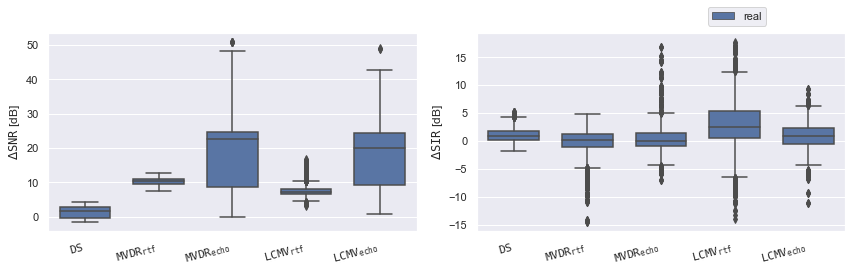

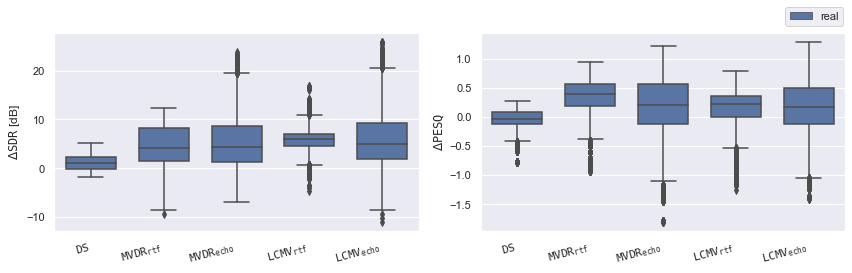

In [14]:
boxplot_performance(df)

# Manual Insight

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/

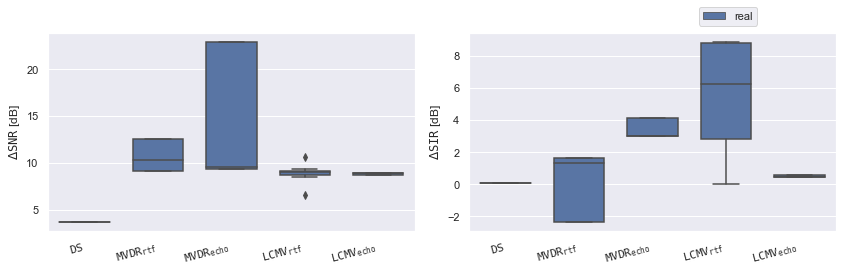

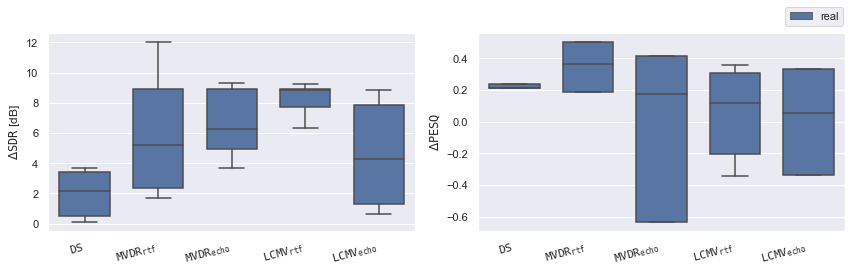

In [29]:
loc_res = df.loc[
      (df['dataset'] == 2) 
    & (df['array'] == 2) 
    & (df['target_idx'] == 0) 
    & (df['interf_idx'] == 1) 
    & (df['spk_comb'] == 1) 
    & (df['spk_comb'] == 1) 
    & (df['sir'] >= 0) 
    & (df['snr'] >= 0) 
]
boxplot_performance(loc_res)

# Performance vs Dataset (~ RT60)

In [ ]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
res